# Linear regression

In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from IPython.display import display

In [2]:
data = './data/'
out = './out/'

# Bold print for Jupyter Notebook
b1 = '\033[1m'
b0 = '\033[0m'

### Just some matplotlib and seaborn parameter tuning

In [3]:
axistitlesize = 20
axisticksize = 17
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')

## 1. Load the provided .npy files. You can load it with numpy.
 - each file contains one vector, X and y
 - visualize X vs y on a scatter plot
 - fit an $y = w_0 + w_1\cdot X + w_2 \cdot X^2$ linear regression using sklearn

### 1./a. Load and visualize data

In [4]:
os.listdir(data)

['.ipynb_checkpoints', 'real_estate.csv', 'X.npy', 'y.npy']

In [5]:
X = np.load(data + 'X.npy')
y = np.load(data + 'y.npy')

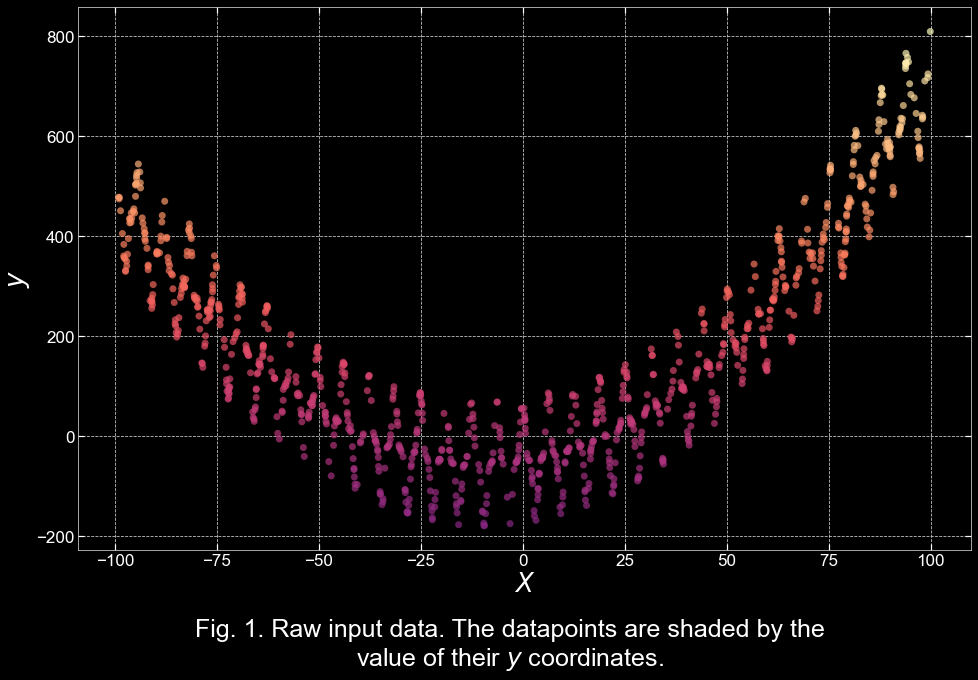

In [6]:
fig, axes = plt.subplots(figsize=(16, 10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

sc = 7
axes.scatter(X, y, label='Original data',
             color=cm.magma(y/y.max()/2 + 0.5), marker='o', ec='none', s=sc**2, alpha=0.7)

axes.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('$y$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

fig.suptitle('Fig. 1. Raw input data. The datapoints are shaded by the\nvalue of their $y$ coordinates.',
             color='white', fontsize=axistitlesize+5, y=0.03)

plt.show()

### Notes

Clearly an intentional sawtooth-like/alternating pattern could be observed in the dataset visualized above. If we want to fit a polynomial on this dataset we're needed to be aware of this artifact, cause it could easily lead us to the textbook case of overfitting. (Obviously that's why this dataset is in the assignment.) Originally there are $1000$ datapoints were randomly generated in the interval $\left[ -100, 100 \right]$ to create the dataset X. An arbitrary second-order polynomial was then created to get the $y$ coordinates. Either the coordinates obtained or one of the original coefficients were then altered by some periodic wave-like function to get the final image.

### 1./b. Fit linear regression using `sklearn`

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score

In [8]:
# Fit from sklearn's documentation
# https://scikit-learn.org/0.23/auto_examples/model_selection/plot_underfitting_overfitting.html
pipeline = Pipeline([("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
                     ("linear_regression", LinearRegression())])
# Transform X for the PolynomialFeatures() and LinearRegression() class
# Then fit on the pipeline the available data
pipeline.fit(X[:, np.newaxis], y)
# Get coefficients
b, a = pipeline[1].coef_
c = pipeline[1].intercept_
# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                         scoring="neg_mean_squared_error", cv=10)
# Test dataset to plot fitted function
X_test = np.linspace(-100, 100, 1000)

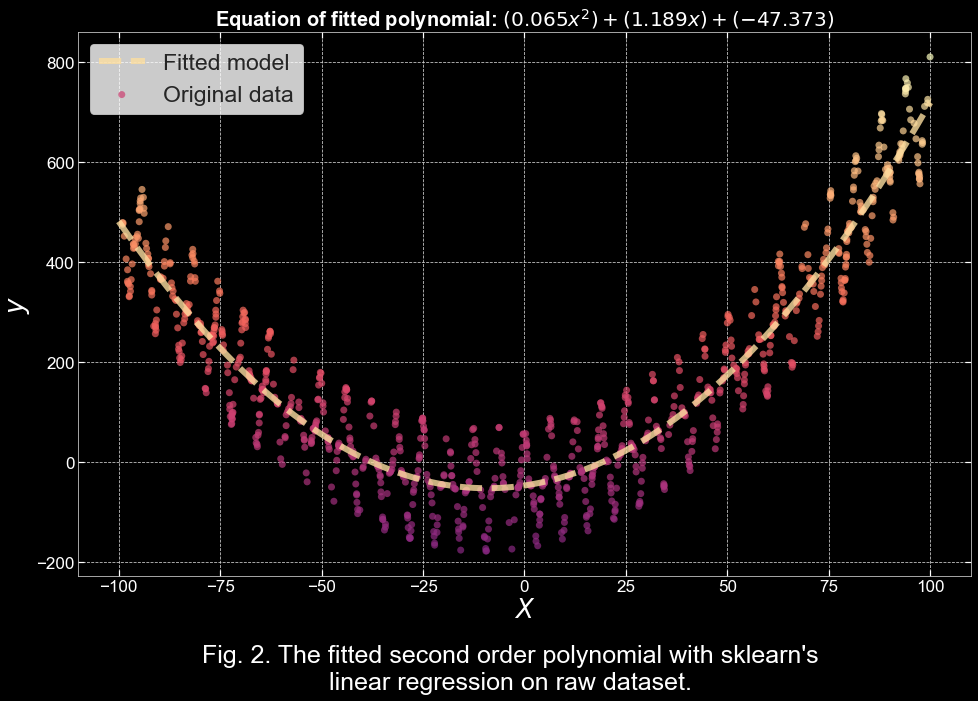

In [9]:
fig, axes = plt.subplots(figsize=(16, 10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

sc = 7
axes.scatter(X, y, label='Original data',
             color=cm.magma(y/y.max()/2 + 0.5), marker='o', ec='none', s=sc**2, alpha=0.7)
axes.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Fitted model',
          color=cm.magma(0.93), lw=6, ls='--', alpha=0.8)

axes.set_title('Equation of fitted polynomial: $({0:.3f}x^2) + ({1:.3f}x) + ({2:.3f})$'.format(a, b, c),
               fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('$y$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

axes.legend(loc='best', fontsize=axislegendsize)

fig.suptitle('Fig. 2. The fitted second order polynomial with sklearn\'s\nlinear regression on raw dataset.',
             color='white', fontsize=axistitlesize+5, y=0.03)

plt.show()

### 2./c. Test whether fit coefficients are actually right

In [10]:
def poly2(X, a, b, c):
    
    return a*X**2 + b*X + c

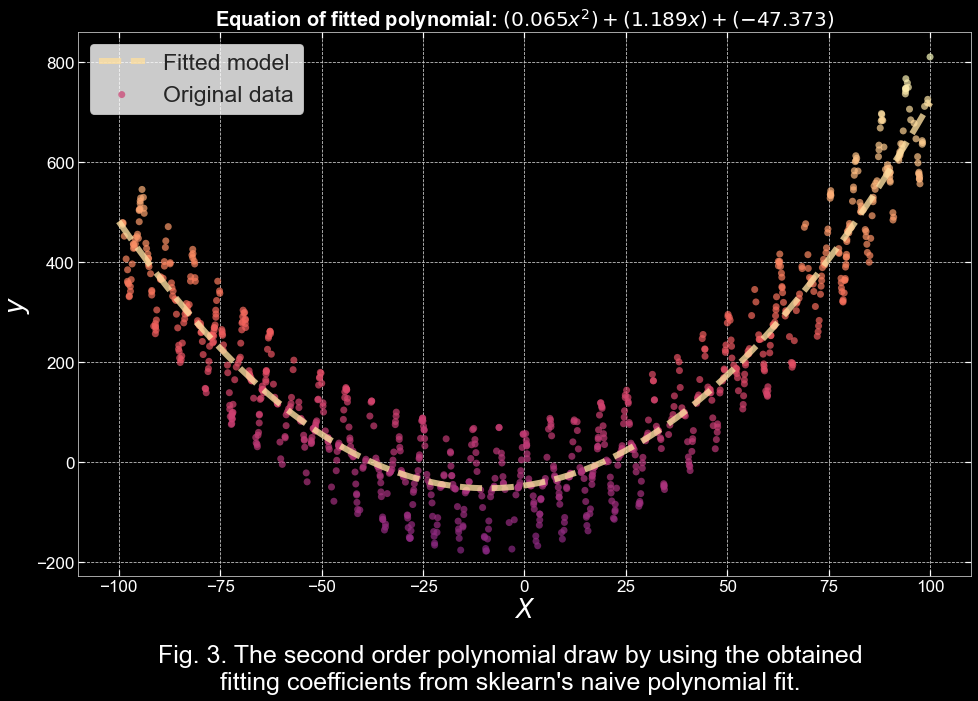

In [11]:
fig, axes = plt.subplots(figsize=(16, 10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

sc = 7
axes.scatter(X, y, label='Original data',
             color=cm.magma(y/y.max()/2 + 0.5), marker='o', ec='none', s=sc**2, alpha=0.7)
axes.plot(X_test, poly2(X=X_test, a=a, b=b, c=c), label='Fitted model',
          color=cm.magma(0.93), lw=6, ls='--', alpha=0.8)

axes.set_title('Equation of fitted polynomial: $({0:.3f}x^2) + ({1:.3f}x) + ({2:.3f})$'.format(a, b, c),
               fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('$y$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

axes.legend(loc='best', fontsize=axislegendsize)

fig.suptitle('Fig. 3. The second order polynomial draw by using the obtained\nfitting coefficients from sklearn\'s naive polynomial fit.',
             color='white', fontsize=axistitlesize+5, y=0.03)

plt.show()

## 2. Using different features
 - plot the residuals (the difference between the prediction and the actual $y$) vs the original $y$
 - a non-random-noise like pattern suggests non-linear connection between the features and the predictions
 - someone told us that the connection between X and y is $y = A \cdot X^{2} + B \cdot X + C\cdot \cos^3(X) + D$
    - using sklearn's linear regression estimate $A, B, C, D$!
 - plot the residuals again! is it better now?

### 2./a. Plot residuals

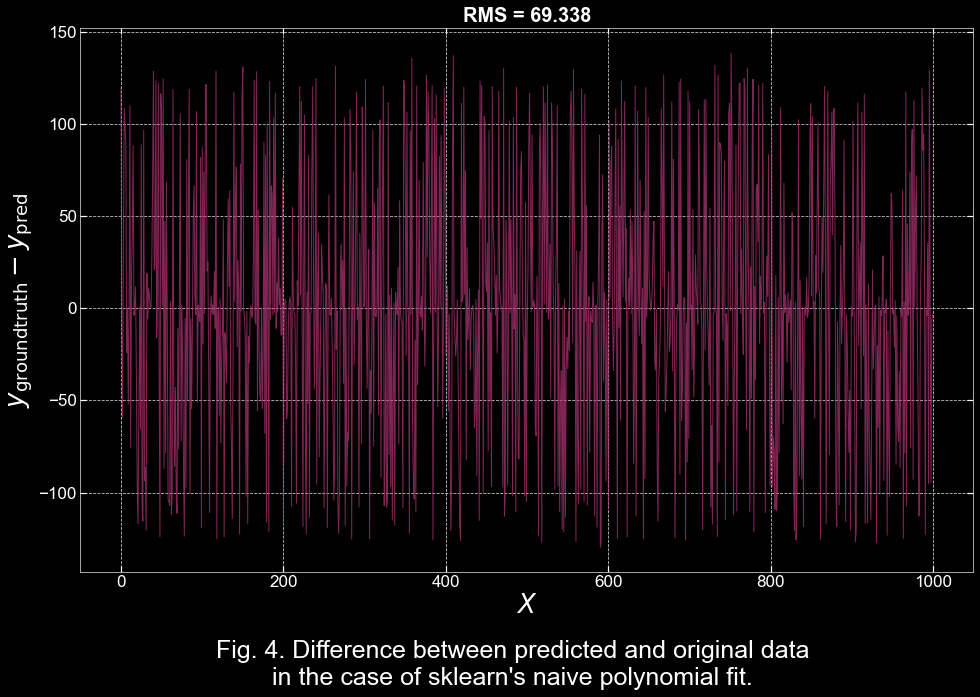

In [12]:
fig, axes = plt.subplots(figsize=(16, 10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

diff = y - pipeline.predict(X[:, np.newaxis])
axes.plot(diff, label='Residuals',
          color=cm.magma(0.5), lw=1, alpha=0.7)

axes.set_title('RMS = {0:.3f}'.format(np.sqrt(np.mean(diff**2))), fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('$y_{\mathrm{groundtruth}} - y_{\mathrm{pred}}$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

fig.suptitle('Fig. 4. Difference between predicted and original data\nin the case of sklearn\'s naive polynomial fit.',
             color='white', fontsize=axistitlesize+5, y=0.03)

plt.show()

### 2./b. Fit more accurate function

In [13]:
def poly2_var(X, a, b, c, d):
    
    return a*X**2 + b*X + c*np.cos(X)**3 + d

#### First test with an arbitrary value $c = 150$

(Fits pretty well actually)

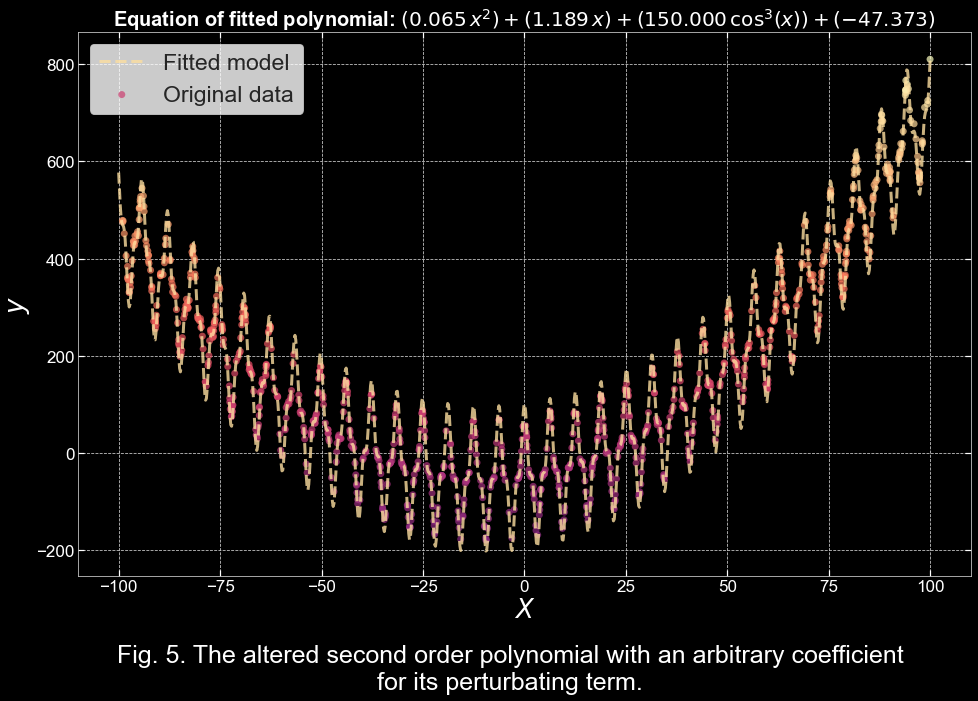

In [14]:
fig, axes = plt.subplots(figsize=(16, 10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

sc = 7
axes.scatter(X, y, label='Original data',
             color=cm.magma(y/y.max()/2 + 0.5), marker='o', ec='none', s=sc**2, alpha=0.7)
axes.plot(X_test, poly2_var(X=X_test, a=a, b=b, c=150, d=c), label='Fitted model',
          color=cm.magma(0.93), lw=3, ls='--', alpha=0.8)

axes.set_title('Equation of fitted polynomial: $({0:.3f}\,x^2) + ({1:.3f}\,x) + ({2:.3f}\,\cos^3(x)) + ({3:.3f})$'.format(a, b, 150, c),
               fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('$y$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

axes.legend(loc='best', fontsize=axislegendsize)

fig.suptitle('Fig. 5. The altered second order polynomial with an arbitrary coefficient\nfor its perturbating term.',
             color='white', fontsize=axistitlesize+5, y=0.03)

plt.show()

#### Now the `sklearn` fit

Fitting an arbitrary function with regression in `sklearn` is a bit tricky and needs two steps. First we need to transform our input data using an `sklearn` transformer, then we can input the obtained dataset into a regressor (eg. `LinearRegression()`). For the first step we need to generate the individual componenets (features) using our arbitrary function. For this I'll use the `FunctionTransformer()` class from the `sklearn.preprocessing` module, because it can be incuded in an `sklearn` pipeline the same way the `PolynomialFeatures()` did in the previous blocks. After that we can simply use linear regression as I stated before.

##### Sources
[1] : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html

In [15]:
from sklearn.preprocessing import FunctionTransformer

In [16]:
def poly2_reg(X):
    
    # Returns the transformed array using the equation
    #    ```A * X^2 + B * cos^3(X) + C * X + D```
    return np.hstack((np.cos(X)**3, X, X**2))

In [17]:
# Fit from sklearn's documentation
# https://scikit-learn.org/0.23/auto_examples/model_selection/plot_underfitting_overfitting.html
pipeline = Pipeline([("polynomial_variation", FunctionTransformer(poly2_reg)),
                     ("linear_regression", LinearRegression())])
# Transform X for the PolynomialFeatures() and LinearRegression() class
# Then fit on the pipeline the available data
pipeline.fit(X[:, np.newaxis], y)
# Get coefficients
c, b, a = pipeline[1].coef_
d = pipeline[1].intercept_
# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                         scoring="neg_mean_squared_error", cv=10)
# Test dataset to plot fitted function
X_test = np.linspace(-100, 100, 1000)

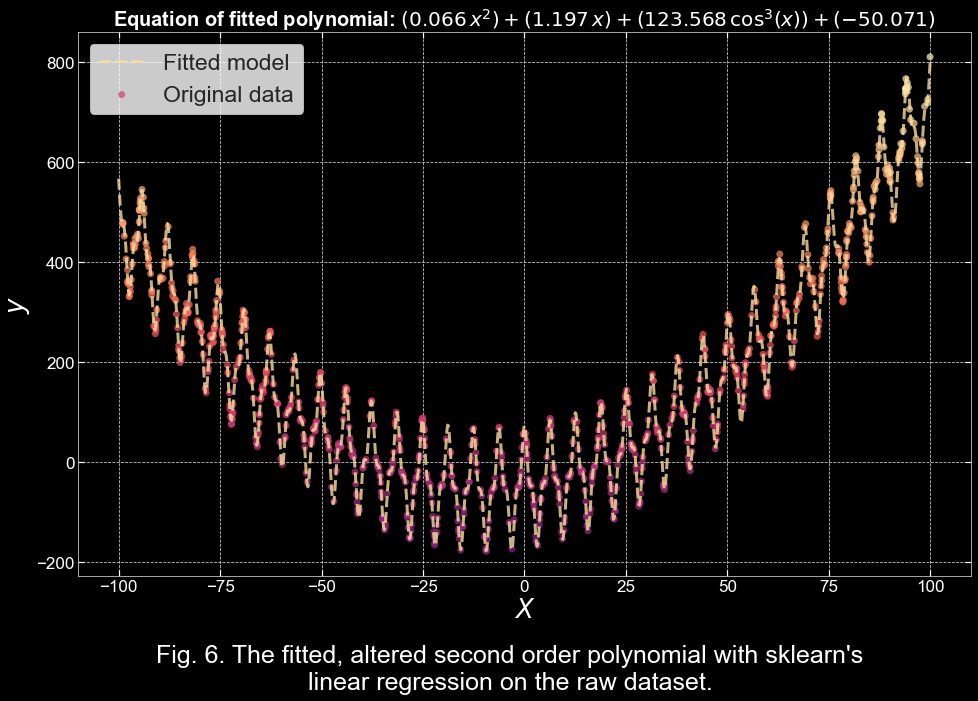

In [18]:
fig, axes = plt.subplots(figsize=(16, 10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

sc = 7
axes.scatter(X, y, label='Original data',
             color=cm.magma(y/y.max()/2 + 0.5), marker='o', ec='none', s=sc**2, alpha=0.7)
axes.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Fitted model',
          color=cm.magma(0.93), lw=3, ls='--', alpha=0.8)

axes.set_title('Equation of fitted polynomial: $({0:.3f}\,x^2) + ({1:.3f}\,x) + ({2:.3f}\,\cos^3(x)) + ({3:.3f})$'.format(a, b, c, d),
               fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('$y$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

axes.legend(loc='best', fontsize=axislegendsize)

fig.suptitle('Fig. 6. The fitted, altered second order polynomial with sklearn\'s\nlinear regression on the raw dataset.',
             color='white', fontsize=axistitlesize+5, y=0.03)

plt.show()

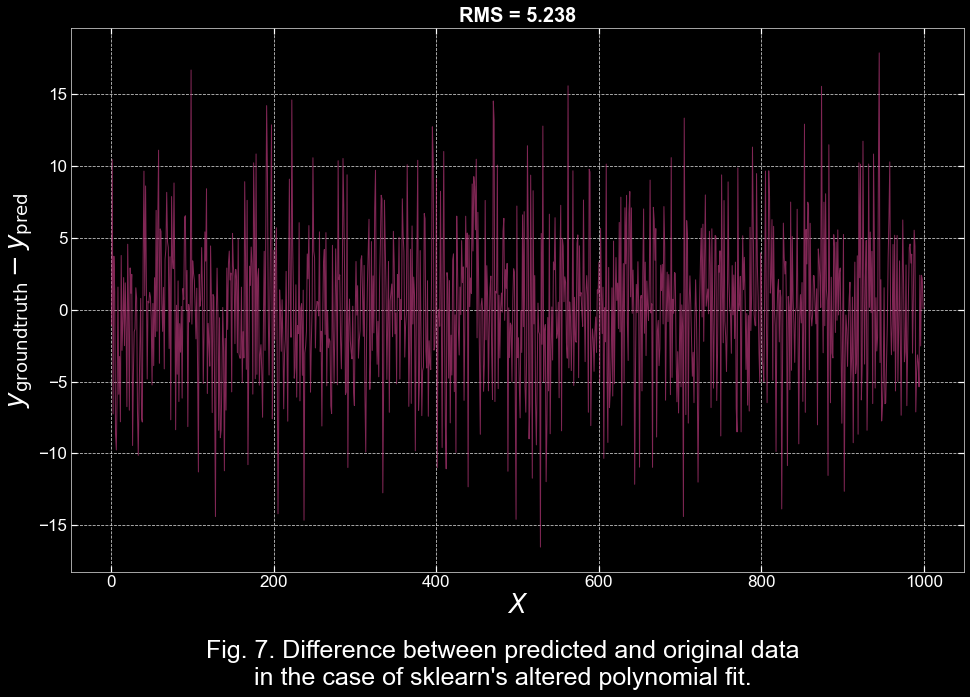

In [19]:
fig, axes = plt.subplots(figsize=(16, 10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

diff = y - pipeline.predict(X[:, np.newaxis])
axes.plot(diff, label='Residuals',
          color=cm.magma(0.5), lw=1, alpha=0.7)

axes.set_title('RMS = {0:.3f}'.format(np.sqrt(np.mean(diff**2))), fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('$y_{\mathrm{groundtruth}} - y_{\mathrm{pred}}$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

fig.suptitle('Fig. 7. Difference between predicted and original data\nin the case of sklearn\'s altered polynomial fit.',
             color='white', fontsize=axistitlesize+5, y=0.03)

plt.show()

## 3. Other methdods than sklearn for linear regression
 - using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
 - is the result the same? if not guess, why? (did you not forget to add the constant term?)
 - try to get the same results with statsmodels as with sklearn!
 - using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?

In [20]:
import statsmodels.api as sm

### 3./a. `statsmodels` on the **first** task

The resulting coefficients are very similar to the coefficients obtained in the first task. Since these coefficients were tested already, we know that these are correct.

In [21]:
# Format the dataset by default now
X_t = X[:, np.newaxis]
# Create a second order polynomial with perturbation from the data
X_t = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_t)
# Append a constant factor for `statsmodels`
X_t = sm.add_constant(X_t)

In [22]:
model = sm.OLS(y, X_t)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     4299.
Date:                Sun, 04 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:26:42   Log-Likelihood:                -5657.9
No. Observations:                1000   AIC:                         1.132e+04
Df Residuals:                     997   BIC:                         1.134e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.3729      3.331    -14.221      0.0

In [23]:
c, b, a = results.params

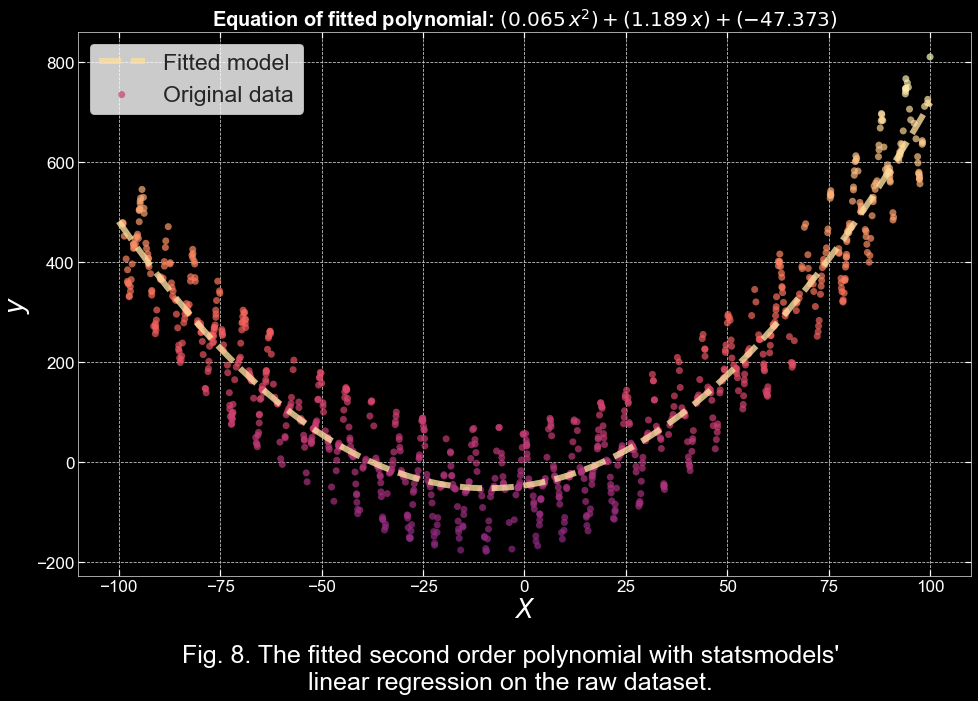

In [24]:
fig, axes = plt.subplots(figsize=(16, 10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

sc = 7
axes.scatter(X, y, label='Original data',
             color=cm.magma(y/y.max()/2 + 0.5), marker='o', ec='none', s=sc**2, alpha=0.7)
axes.plot(X_test, poly2(X_test, a, b, c), label='Fitted model',
          color=cm.magma(0.93), lw=6, ls='--', alpha=0.8)

axes.set_title('Equation of fitted polynomial: $({0:.3f}\,x^2) + ({1:.3f}\,x) + ({2:.3f})$'.format(a, b, c),
               fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('$y$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

axes.legend(loc='best', fontsize=axislegendsize)

fig.suptitle('Fig. 8. The fitted second order polynomial with statsmodels\'\nlinear regression on the raw dataset.',
             color='white', fontsize=axistitlesize+5, y=0.03)

plt.show()

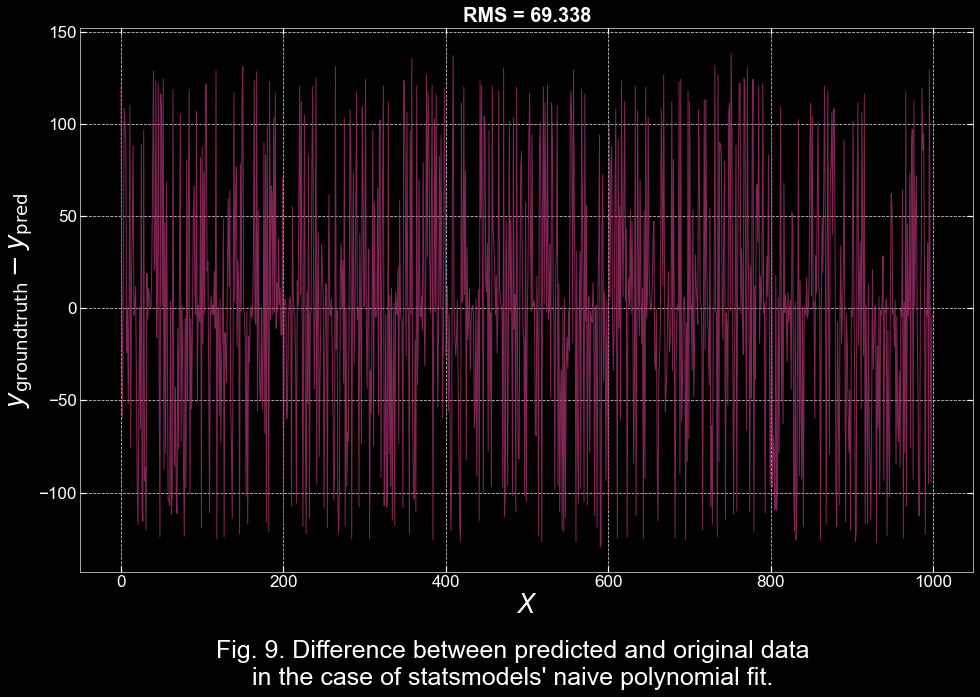

In [25]:
fig, axes = plt.subplots(figsize=(16, 10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

diff = y - poly2(X, a, b, c)
axes.plot(diff, label='Residuals',
          color=cm.magma(0.5), lw=1, alpha=0.7)

axes.set_title('RMS = {0:.3f}'.format(np.sqrt(np.mean(diff**2))), fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('$y_{\mathrm{groundtruth}} - y_{\mathrm{pred}}$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

fig.suptitle('Fig. 9. Difference between predicted and original data\nin the case of statsmodels\' naive polynomial fit.',
             color='white', fontsize=axistitlesize+5, y=0.03)

plt.show()

### 3./a. `statsmodels` on the **second** task

In [26]:
# Format the dataset by default now
X_t = X[:, np.newaxis]
# Create a second order polynomial from the data
X_t = FunctionTransformer(poly2_reg).fit_transform(X_t)
# Append a constant factor for `statsmodels`
X_t = sm.add_constant(X_t)

In [27]:
model = sm.OLS(y, X_t)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.596e+05
Date:                Sun, 04 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:26:43   Log-Likelihood:                -3074.8
No. Observations:                1000   AIC:                             6158.
Df Residuals:                     996   BIC:                             6177.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.0711      0.252   -198.817      0.0

In [28]:
d, c, b, a = results.params

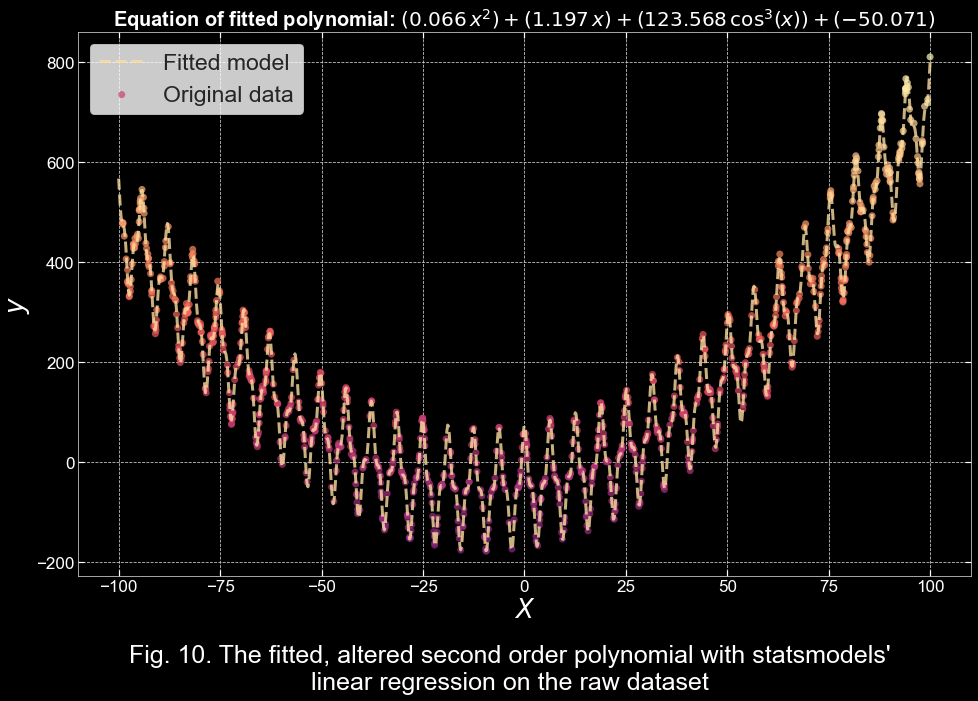

In [29]:
fig, axes = plt.subplots(figsize=(16, 10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

sc = 7
axes.scatter(X, y, label='Original data',
             color=cm.magma(y/y.max()/2 + 0.5), marker='o', ec='none', s=sc**2, alpha=0.7)
axes.plot(X_test, poly2_var(X_test, a, b, c, d), label='Fitted model',
          color=cm.magma(0.93), lw=3, ls='--', alpha=0.8)

axes.set_title('Equation of fitted polynomial: $({0:.3f}\,x^2) + ({1:.3f}\,x) + ({2:.3f}\,\cos^3(x)) + ({3:.3f})$'.format(a, b, c, d),
               fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('$y$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

axes.legend(loc='best', fontsize=axislegendsize)

fig.suptitle('Fig. 10. The fitted, altered second order polynomial with statsmodels\'\nlinear regression on the raw dataset',
             color='white', fontsize=axistitlesize+5, y=0.03)

plt.show()

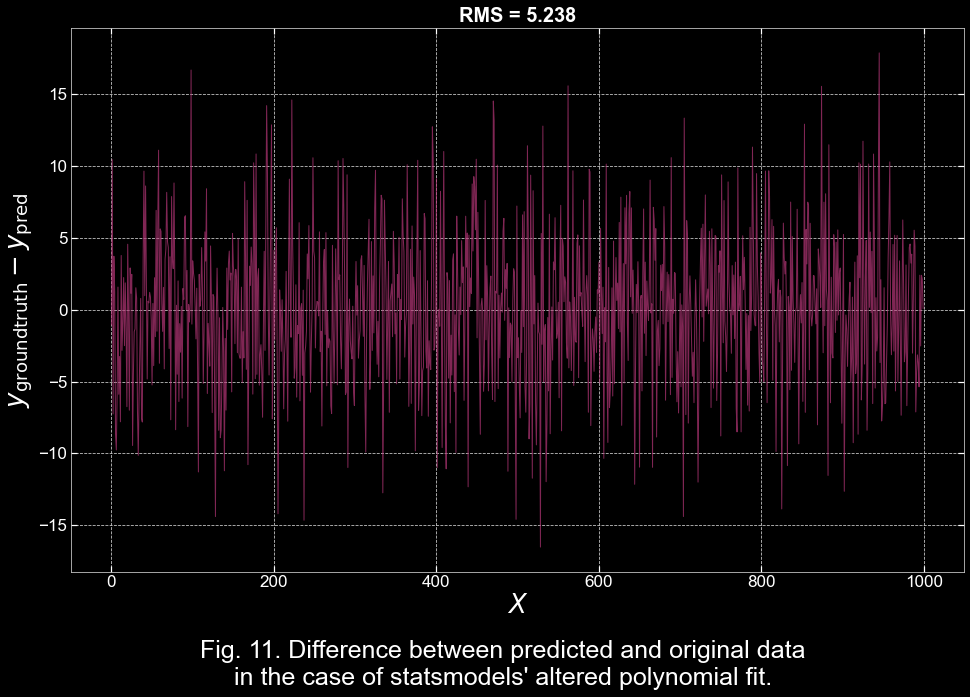

In [30]:
fig, axes = plt.subplots(figsize=(16, 10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

diff = y - poly2_var(X, a, b, c, d)
axes.plot(diff, label='Residuals',
          color=cm.magma(0.5), lw=1, alpha=0.7)

axes.set_title('RMS = {0:.3f}'.format(np.sqrt(np.mean(diff**2))), fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('$y_{\mathrm{groundtruth}} - y_{\mathrm{pred}}$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

fig.suptitle('Fig. 11. Difference between predicted and original data\nin the case of statsmodels\' altered polynomial fit.',
             color='white', fontsize=axistitlesize+5, y=0.03)

plt.show()

The second fit is trivially much-much better, as all scoring functions shows it in the upper right column. Also the obtained function form could be plotted seamlessly on the original data. There is a very slight difference between `sklearn` and `statsmodels`, which arises from the difference in their fitting algorithms, but they virtually gave the same results.

## 4. Analyze the real estate dataset
 - load the real_estate.csv to a pandas dataframe
 - drop the ID column and the geographic location columns
 - fit a linear regression model to predict the unit price using sklearn

### 4./a. Load and "preprocess" data

In [31]:
df = pd.read_csv(data + 'real_estate.csv', sep=',', index_col='No')

In [32]:
display(df.head())
display(df.tail())

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [33]:
df_used = df.drop(columns=['X5 latitude', 'X6 longitude'])

In [34]:
display(df_used.head())
display(df_used.tail())

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
No,,,,,
1,2012.917,32.0,84.87882,10,37.9
2,2012.917,19.5,306.59470,9,42.2
3,2013.583,13.3,561.98450,5,47.3
4,2013.500,13.3,561.98450,5,54.8
5,2012.833,5.0,390.56840,5,43.1


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
No,,,,,
410,2013.000,13.7,4082.01500,0,15.4
411,2012.667,5.6,90.45606,9,50.0
412,2013.250,18.8,390.96960,7,40.6
413,2013.000,8.1,104.81010,5,52.5
414,2013.500,6.5,90.45606,9,63.9


### 4./b. Fit a model using linear regression

In [35]:
from sklearn.metrics import r2_score

In [36]:
def line(X, m, b):
    
    Y = m * X + b
    
    return Y

In [37]:
X_es = np.array(df_used[df_used.columns[:-1]])
y_es = np.array(df_used[df_used.columns[-1]])

X_es_train = X_es[::2]
y_es_train = y_es[::2]
X_es_test = X_es[1::2]
y_es_test = y_es[1::2]

In [38]:
model_train = LinearRegression().fit(X_es_train, y_es_train)
model_full = LinearRegression().fit(X_es, y_es)
# Compute predictions
pred_train = model_train.predict(X_es_train)
pred_test = model_train.predict(X_es_test)
pred_full = model_full.predict(X_es)
# Compute R-squared error
r_sq_train = model_train.score(X_es_train, y_es_train)
r_sq_full = model_full.score(X_es, y_es)

In [39]:
print(b1 + 'TRAIN DATASET FIT' + b0 + '\n' +
           '-----------------')
print(b1 + 'Coefficient of determination (TRAIN):' + b0, r_sq_train)
print(b1 + 'Intercept (TRAIN):' + b0, model_train.intercept_)
print(b1 + 'Slope coefficients (TRAIN):' + b0)
for col, mc in zip(df_used.columns[:-1], model_train.coef_):
    print('    {0} : {1}'.format(col[:2], mc))

print()
print(b1 + 'FULL DATASET FIT' + b0 + '\n' +
           '----------------')
print(b1 + 'Coefficient of determination (FULL):' + b0, r_sq_full)
print(b1 + 'Intercept (FULL):' + b0, model_full.intercept_)
print(b1 + 'Slope coefficients (FULL):' + b0)
for col, mc in zip(df_used.columns[:-1], model_full.coef_):
    print('    {0} : {1}'.format(col[:2], mc))

TRAIN DATASET FIT
-----------------
Coefficient of determination (TRAIN): 0.49802954163047874
Intercept (TRAIN): -10236.964304620322
Slope coefficients (TRAIN):
    X1 : 5.107329995480208
    X2 : -0.24294750165839085
    X3 : -0.005728810527065582
    X4 : 1.073976538582204

FULL DATASET FIT
----------------
Coefficient of determination (FULL): 0.5552973207362626
Intercept (FULL): -11588.74780012285
Slope coefficients (FULL):
    X1 : 5.778042819974498
    X2 : -0.2544779730862604
    X3 : -0.005512996980547616
    X4 : 1.2578641003854256


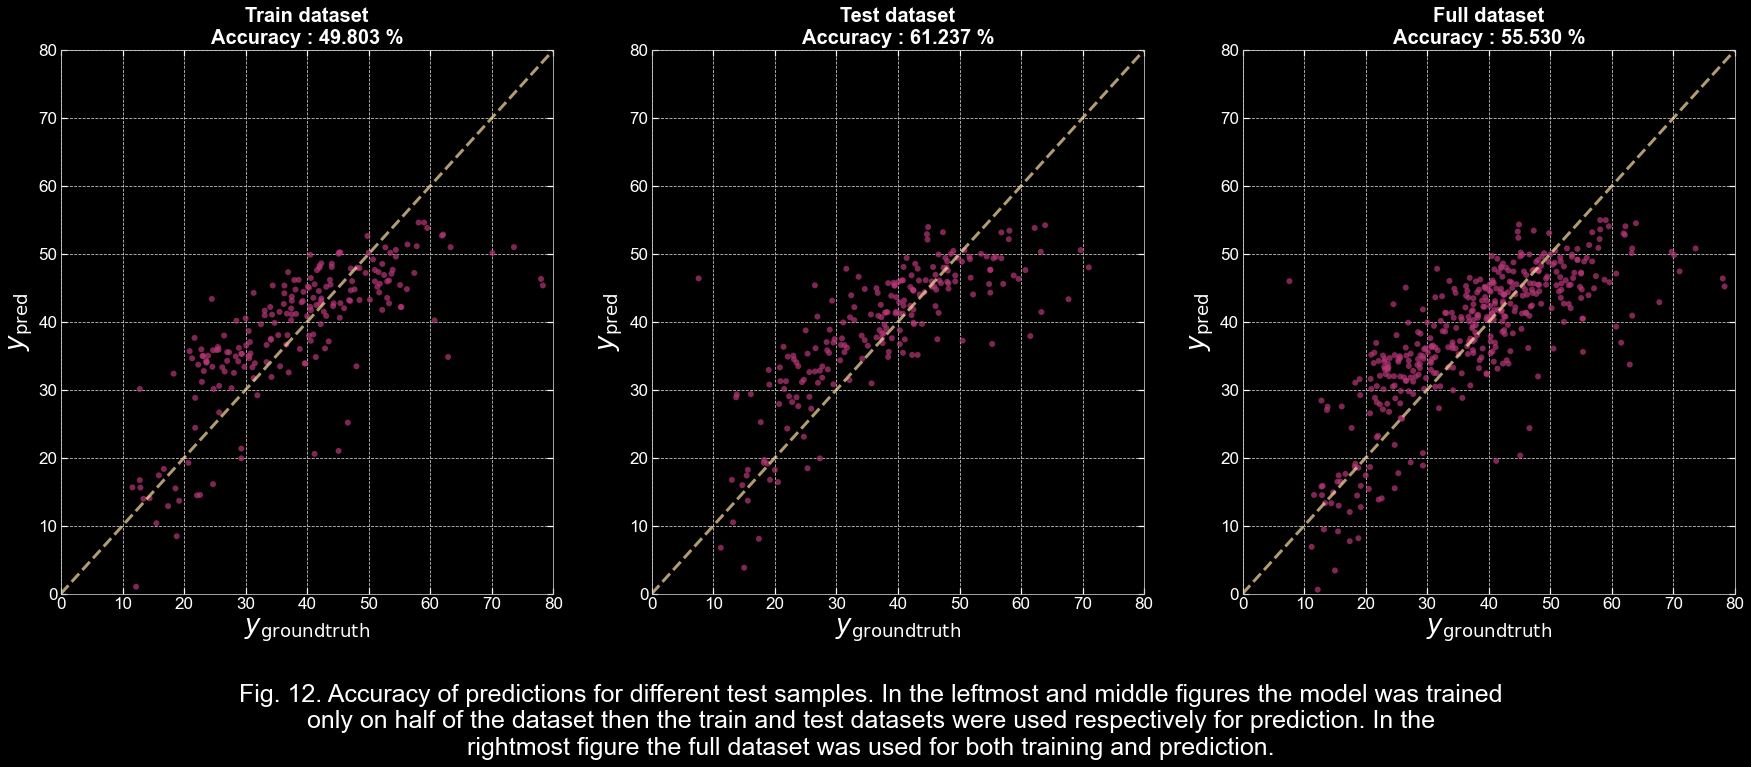

In [40]:
nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*10, nrows*10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})
fig.subplots_adjust(hspace=0.2, wspace=0.2)

sc = 6

# Pred and groundtruth y values
y_pred = [pred_train, pred_test, pred_full]
y_grnd = [y_es_train, y_es_test, y_es]
# Titles for subplots
titles = ['Train dataset', 'Test dataset', 'Full dataset']
# X values for the m=1, b=0 line
x_line = np.linspace(0,80,80)
for i in range(ncols):
    ax = axes[i]
    
    ax.set_xlim(0,80)
    ax.set_ylim(0,80)
    
    ax.scatter(y_grnd[i], y_pred[i],
               color=cm.magma(0.5), marker='o', ec='none', s=sc**2, alpha=0.7)
    ax.plot(x_line, line(x_line, m=1, b=0),
            color=cm.magma(0.93), lw=3, ls='--', alpha=0.7)
    ax.set_title(titles[i] + '\nAccuracy : {0:.3f} %'.format(r2_score(y_grnd[i], y_pred[i]) * 100),
                 fontsize=axistitlesize, fontweight='bold', color='white')
    ax.set_xlabel('$y_{\mathrm{groundtruth}}$', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.set_ylabel('$y_{\mathrm{pred}}$', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')
    
fig.suptitle('Fig. 12. Accuracy of predictions for different test samples. In the leftmost and middle figures the model was trained\n' +
             'only on half of the dataset then the train and test datasets were used respectively for prediction. In the\n' +
             'rightmost figure the full dataset was used for both training and prediction.',
             color='white', fontsize=axistitlesize+5, y=0.00)
    
plt.show()

## 5. Interpret results
 - interpret the coefficients and their meaning shortly with your own words
 - plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?

### 5./a. Interpret coefficients

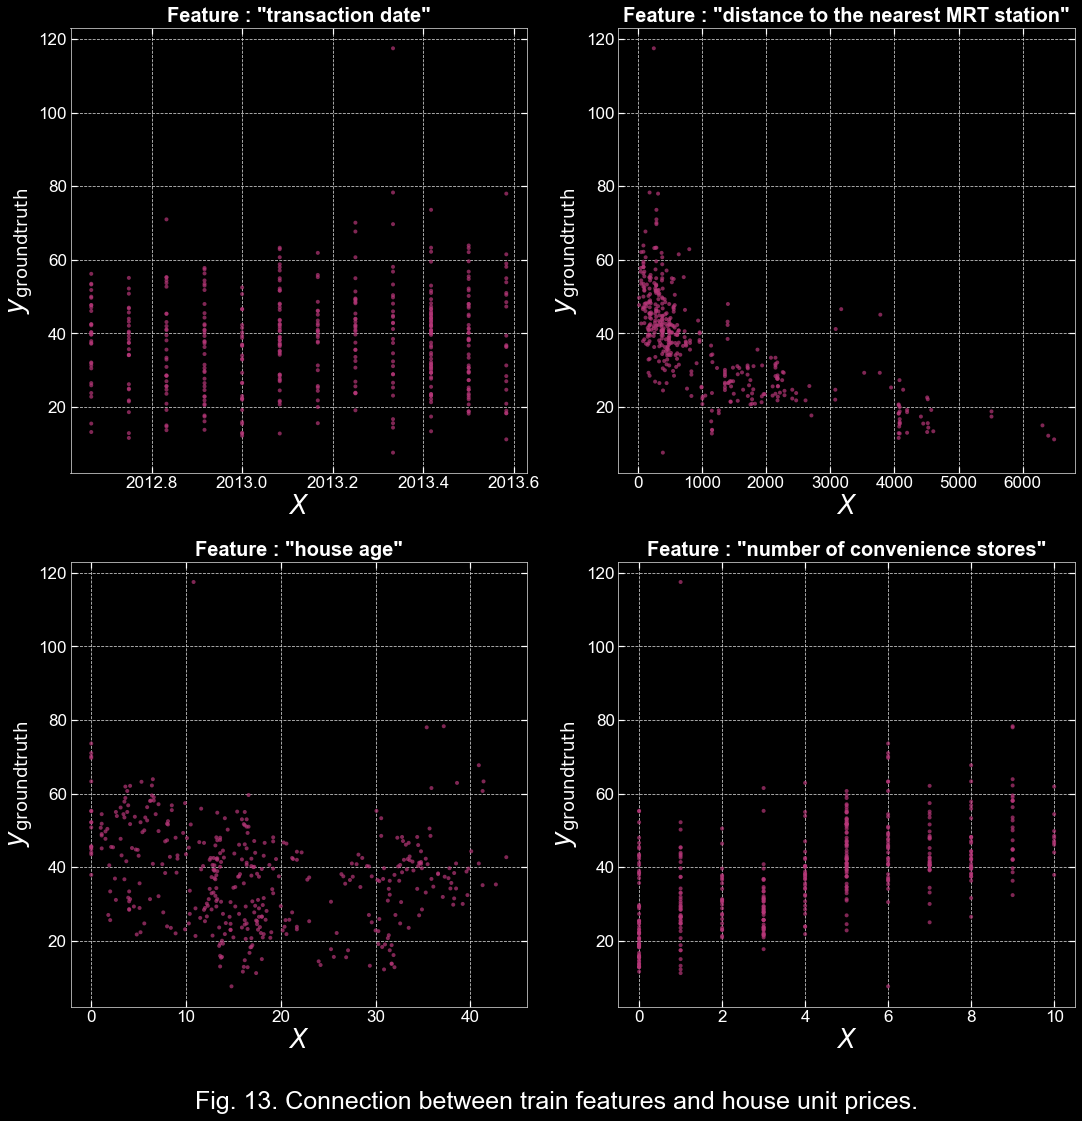

In [41]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*9, nrows*9),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})
fig.subplots_adjust(hspace=0.2, wspace=0.2)

sc = 4
for i in range(nrows):
    for j in range(ncols):
        # For abbreviation select relevant data for current subplot
        ax = axes[j][i]
        idx = i*ncols + j
        col = df_used.columns[:-1][idx]
        x_es = X_es[:, idx]
        
        ax.scatter(x_es, y_es,
                   color=cm.magma(0.5), marker='o', ec='none', s=sc**2, alpha=0.7)
        
        ax.set_title('Feature : "{0}"'.format(col[3:]),
                     fontsize=axistitlesize, fontweight='bold', color='white')
        ax.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
        ax.set_ylabel('$y_{\mathrm{groundtruth}}$', fontsize=axislabelsize, fontweight='bold', color='white')
        ax.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

fig.suptitle('Fig. 13. Connection between train features and house unit prices.',
             color='white', fontsize=axistitlesize+5, y=0.06)
        
plt.show()

The four obtained coefficients are clearly the slopes of linear functions fitted on the four point ensembles above. It could be seen by doing a linear fit on data on the subplots above.

This individual analysis of features and house prices below really gives us coefficients close to the ones obtained above.

In [42]:
# Number of features
N_features = X_es.shape[1]
# Save coefficients and locations of intercept of linear fits
coeffs = np.zeros(N_features)
intercepts = np.zeros(N_features)
for i in range(N_features):
    model = LinearRegression().fit(X_es[:, i][:, np.newaxis], y_es)
    coeffs[i] = model.coef_
    intercepts[i] = model.intercept_

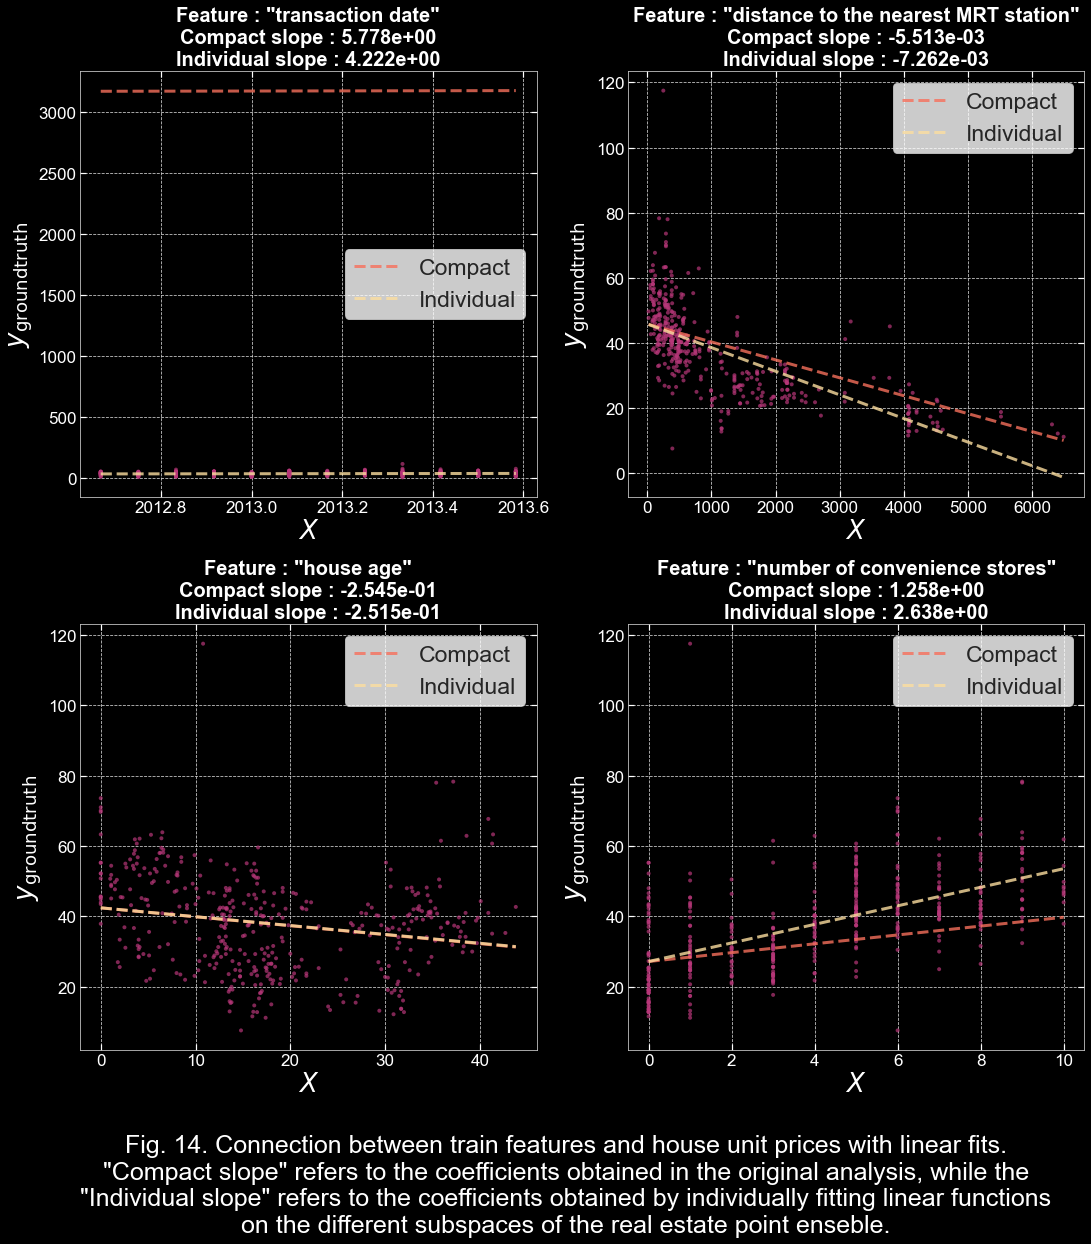

In [43]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*9, nrows*9),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})
fig.subplots_adjust(hspace=0.3, wspace=0.2)

sc = 4
for i in range(nrows):
    for j in range(ncols):
        # For abbreviation select relevant data for current subplot
        ax = axes[j][i]
        idx = i*ncols + j
        col = df_used.columns[:-1][idx]
        x_es = X_es[:, idx]
        
        x_test = np.linspace(x_es.min(), x_es.max(), 80)
        ax.scatter(x_es, y_es,
                   color=cm.magma(0.5), marker='o', ec='none', s=sc**2, alpha=0.7)
        ax.plot(x_test, line(x_test, m=model_full.coef_[idx], b=intercepts[idx]), label='Compact',
                color=cm.magma(0.7), lw=3, ls='--', alpha=0.8)
        ax.plot(x_test, line(x_test, m=coeffs[idx], b=intercepts[idx]), label='Individual',
                color=cm.magma(0.93), lw=3, ls='--', alpha=0.8)
        
        ax.set_title('Feature : "{0}"\nCompact slope : {1:.3e}\nIndividual slope : {2:.3e}'.format(col[3:], model_full.coef_[idx], coeffs[idx]),
                     fontsize=axistitlesize, fontweight='bold', color='white')
        ax.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
        ax.set_ylabel('$y_{\mathrm{groundtruth}}$', fontsize=axislabelsize, fontweight='bold', color='white')
        ax.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

        ax.legend(loc='best', fontsize=axislegendsize)
        
fig.suptitle('Fig. 14. Connection between train features and house unit prices with linear fits.\n' +
             '"Compact slope" refers to the coefficients obtained in the original analysis, while the\n' +
             '"Individual slope" refers to the coefficients obtained by individually fitting linear functions\n' +
             'on the different subspaces of the real estate point enseble.',
             color='white', fontsize=axistitlesize+5, y=0.06)
        
plt.show()

#### Notes

The upper left subplot is actually correct. Since the intercept of the fit is a relatively large number ($b \approx -8400$), the fitted line's position will be very sensitive to the value of its slope. That's why with $m \approx 5.7$ the line of predictions runs really far away from the one with the coefficient $m \approx 4.2$.

### 5./b. Plot residuals

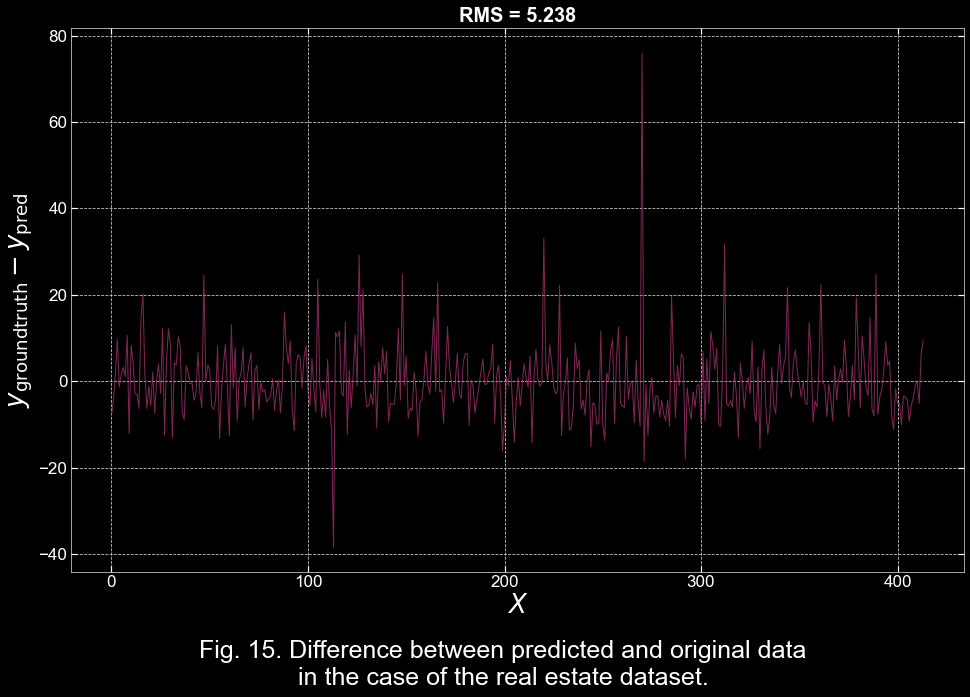

In [44]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(figsize=(16, 10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

diff_es = y_es - pred_full
axes.plot(diff_es, label='Residuals',
          color=cm.magma(0.5), lw=1, alpha=0.7)

axes.set_title('RMS = {0:.3f}'.format(np.sqrt(np.mean(diff**2))), fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('$y_{\mathrm{groundtruth}} - y_{\mathrm{pred}}$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

fig.suptitle('Fig. 15. Difference between predicted and original data\nin the case of the real estate dataset.',
             color='white', fontsize=axistitlesize+5, y=0.03)

plt.show()

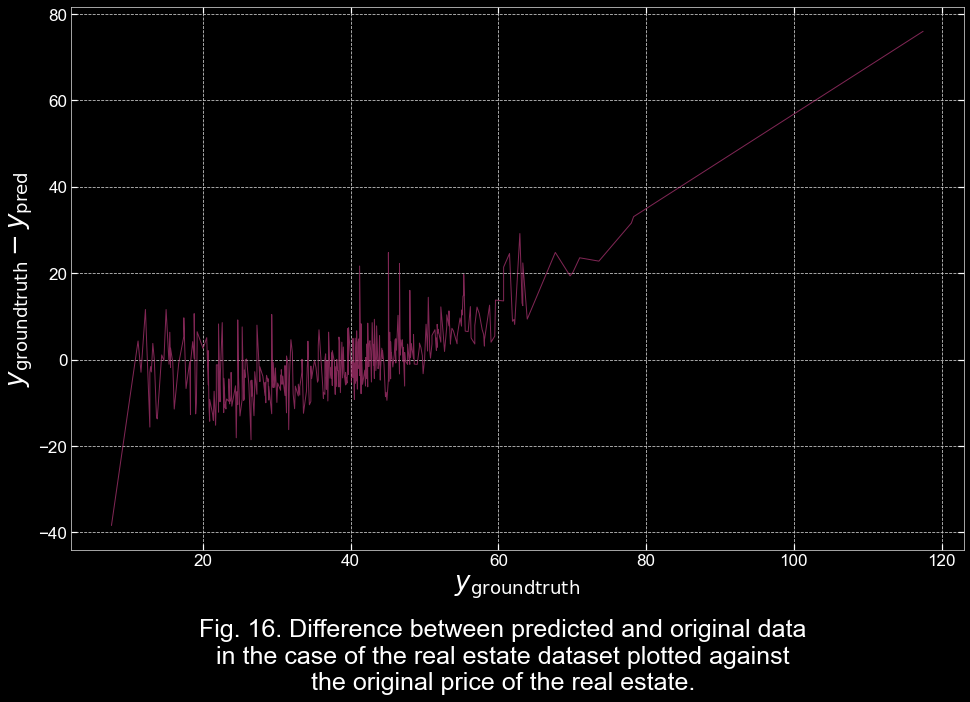

In [45]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(figsize=(16, 10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

diff_es = y_es - pred_full
y_es_s, diff_es_s = zip(*sorted(zip(y_es, diff_es)))
axes.plot(y_es_s, diff_es_s, label='Residuals',
          color=cm.magma(0.5), lw=1, alpha=0.7)

axes.set_xlabel('$y_{\mathrm{groundtruth}}$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('$y_{\mathrm{groundtruth}} - y_{\mathrm{pred}}$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

fig.suptitle('Fig. 16. Difference between predicted and original data\nin the case of the real estate dataset plotted against\nthe original price of the real estate.',
             color='white', fontsize=axistitlesize+5, y=0.03)

plt.show()

Probably the best choice is to buy the house with the lowest negative difference between $y_{\mathrm{groundtruth}}$ and $y_{\mathrm{pred}}$. This means that according to our model the house is seriously underpriced, so we could make the most profit buying it.

### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 